그래프(graph)는 다음 그림처럼 노드(node, vertex)와 그 사이를 잇는 간선(edge)으로 이루어진 구조를 말한다.

In [1]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

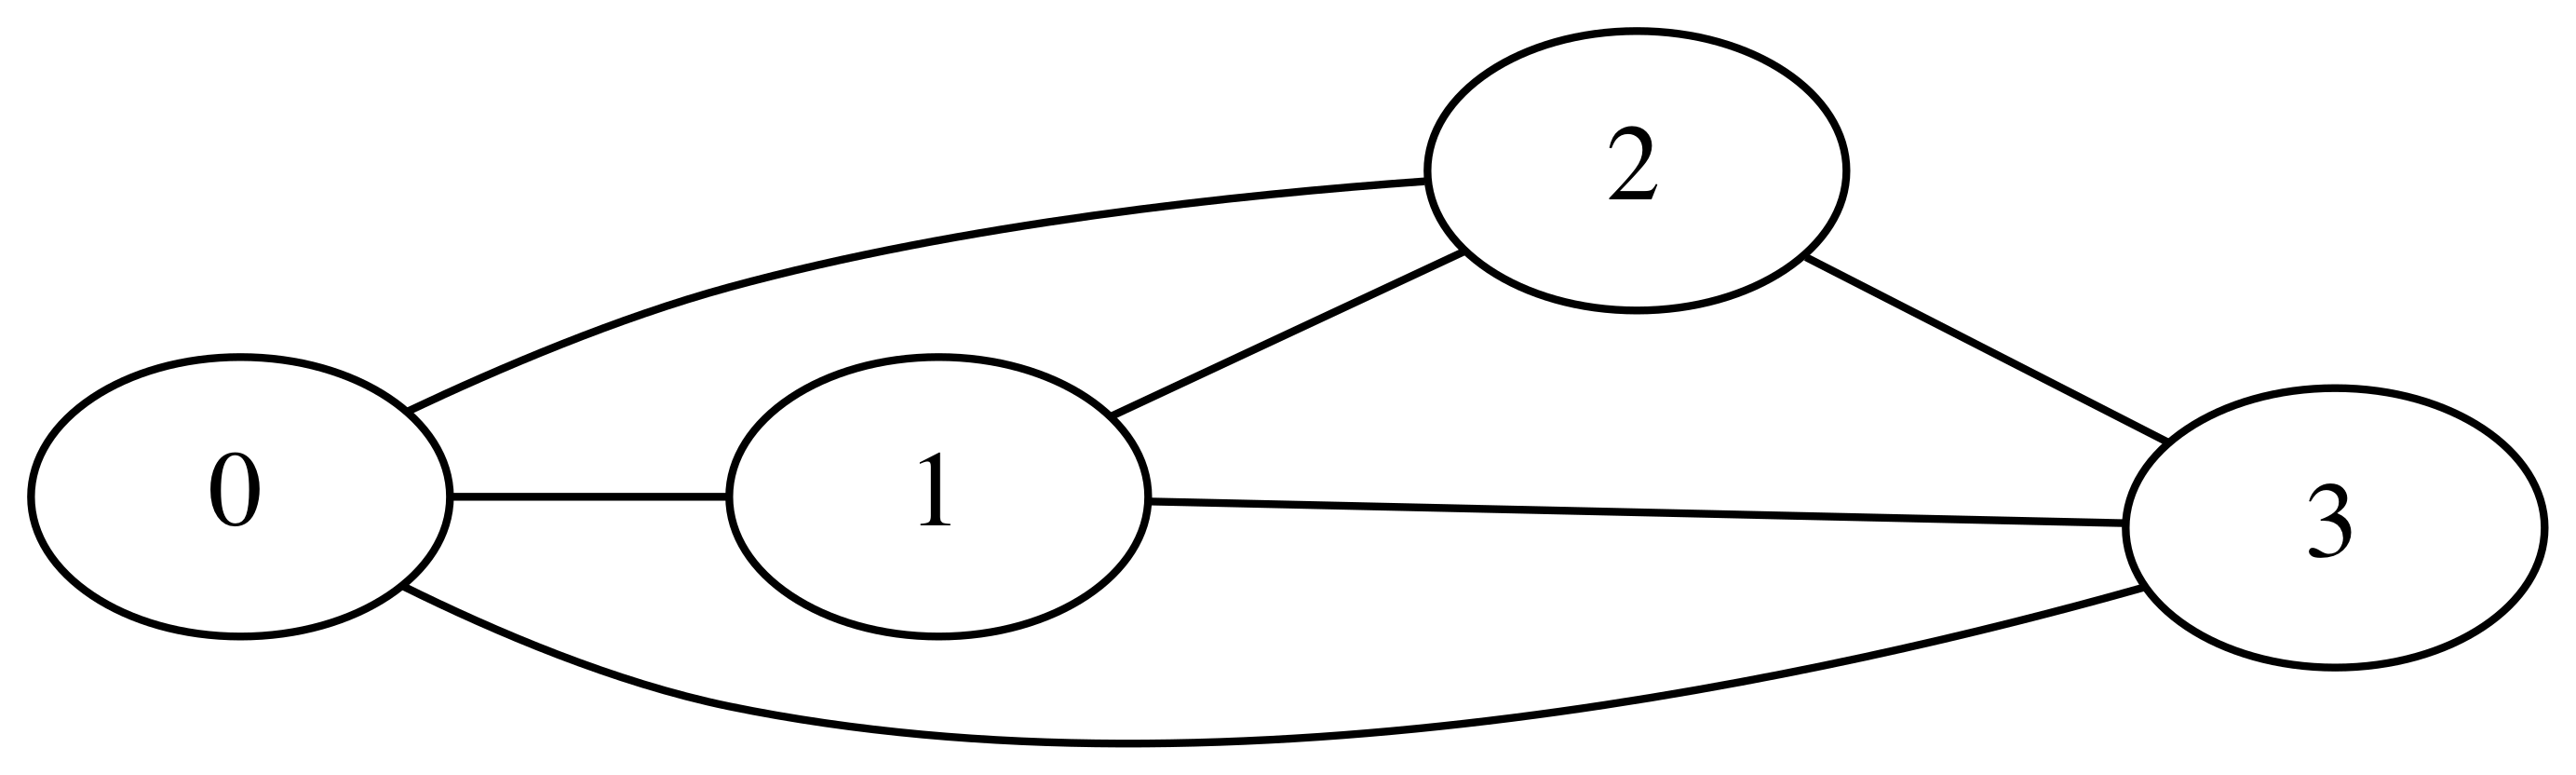

In [4]:
g = nx.complete_graph(4)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir('LR')
Image(d.create_png(), width=600)

수학적으로 그래프  𝐺 는 노드(vertex) 집합  𝑉 와 간선(edge) 집합  𝐸 로 구성된다.

$$G = (V, E)$$

간선은 두 개의 노드로 이루어진 순서가 있는 쌍(ordered pair)이다.

$$E \subseteq V \times V$$

위에서 그린 그래프는 4개의 노드 집합

$$V = \{ 0, 1, 2, 3 \}$$

과 6개의 간선 집합

$$E = \{ (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3) \}$$

를 가진다.

## 방향성 그래프와 비방향성 그래프

만약 간선  (𝑎,  𝑏) 와  (𝑏,  𝑎) 이 있을 때 이 두 간선을 다른 것으로 본다면 간선의 방향이 있는 방향성 그래프(directed graph)이고 두 간선을 같은 것으로 본다면 간선의 방향이 없는 비방향성 그래프(undirected graph)이다. 그래프를 시각화를 할 때 방향성은 화살표로 표시한다.

## NetworkX 패키지

NetworkX는 그래프를 다루기 위한 파이썬 패키지이다. 그래프를 만드는 클래스 Graph, DiGraph를 제공한다. Graph 클래스는 비방향성 그래프, DiGraph 클래스는 방향성 그래프를 나타낸다.

NetworkX 패키지는 원래 버전 2 이상이 나와 있지만 여기에서는 나중에 사용할 pgmpy 패키지와의 호환성을 위해 버전 1.11을 사용하도록 한다.

In [5]:
import networkx
networkx.__version__

'1.11'

In [6]:
import networkx as nx
g1 = nx.DiGraph()

노드를 추가할 때는 add_node 메서드를 사용한다. 노드의 이름으로는 숫자나 문자열을 사용할 수 있다. 그래프에 포함된 노드는 nodes 메서드(버전 2에서는 속성)으로 확인할 수 있다.

In [7]:
g1.add_node("a")
g1.add_node(1)
g1.add_node(2)
g1.nodes()

['a', 1, 2]

간선을 추가할 때는 add_edge 메서드(버전 2에서는 속성)를 사용한다. 간선을 이을 두 노드을 인수로 입력한다. 그래프에 포함된 노드는 nodes 속성으로 확인할 수 있다.

In [8]:
g1.add_edge(1, "a")
g1.add_edge(1, 2)
g1.edges()

[(1, 'a'), (1, 2)]

만약 graphviz 프로그램과 pydot 패키지가 설치되어 있다면 이를 이용하여 시각화할 수도 있다.

In [9]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

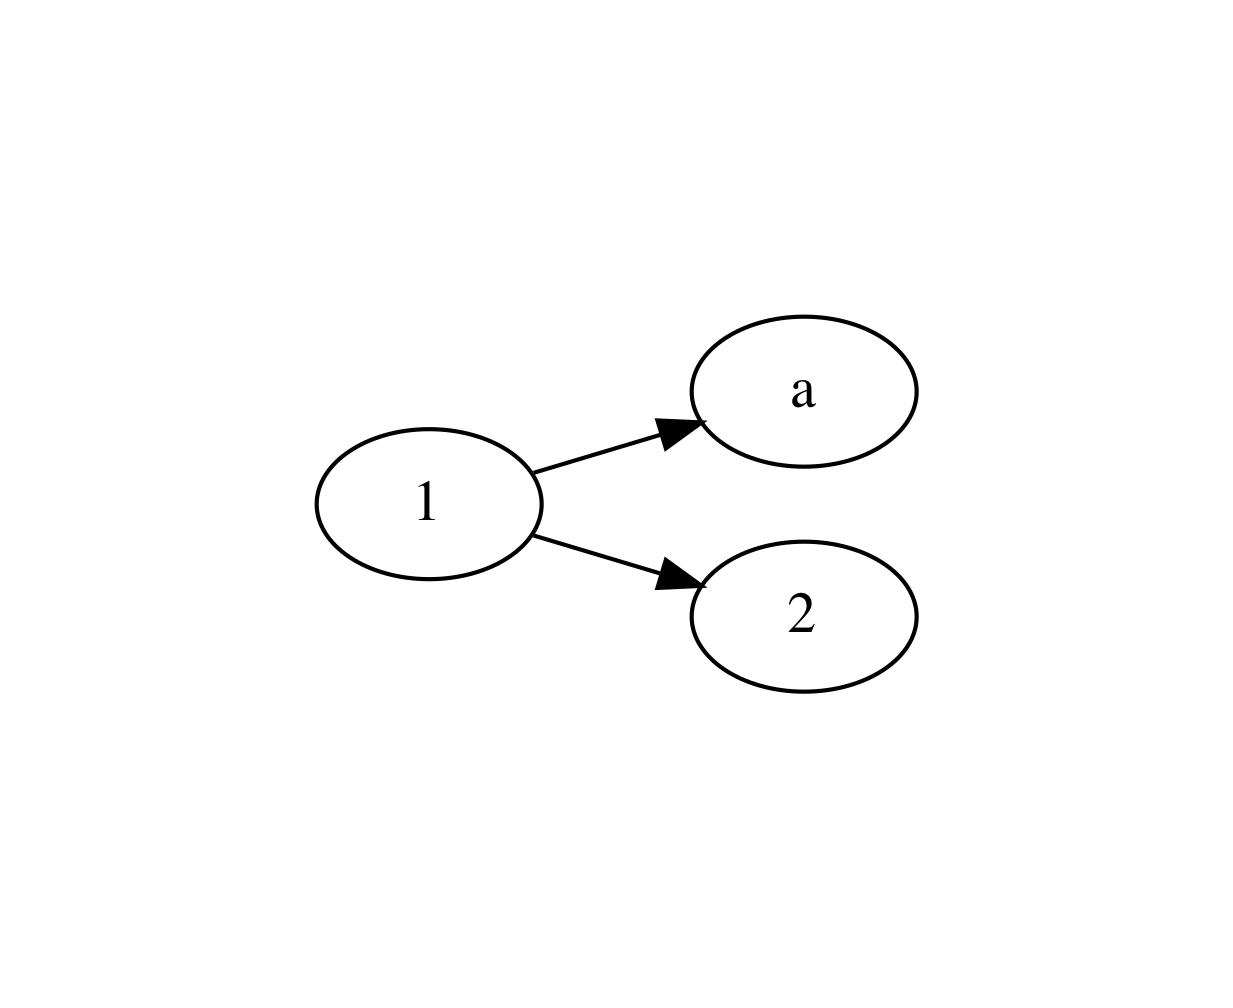

In [10]:
d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_rankdir("LR")
d1.set_margin(1)
Image(d1.create_png(), width=300)

노드 집합  𝑉 와 간선 집합  𝐸 를 가지는 그래프  𝐺 에 포함된 노드의 갯수를 그래프의 크기(cardinality)라고 하며  |𝐺| 또는  |𝑉| 로 나타내고 간선의 갯수는  |𝐸| 로 나타낸다.

NetworkX 패키지에서는 각각 len 명령, number_of_nodes, number_of_edges 메서드로 계산할 수 있다.

In [11]:
len(g1), g1.number_of_nodes(), g1.number_of_edges()

(3, 3, 2)

만약 두 노드  𝑎 ,  𝑏 를 포함하는 간선  (𝑎,𝑏) 가  𝐸  안에 존재하면 두 노드는 인접하다(adjacent)고 하며 인접한 두 노드는 서로 이웃(neighbor)이라고 한다.

$$(a,b) \in E$$

NetworkX 패키지 Graph 클래스의 neighbors 메서드는 인수로 받은 노드에 인접한 노드를 생성하므로 인접성을 확인하는데 사용할 수 있다.

In [12]:
for n in g1.neighbors(1):  # node 1의 neighbors
    print(n)

a
2


In [13]:
2 in g1.neighbors(1), 1 in g1.neighbors(2), "a" in g1.neighbors(2), "a" in g1.neighbors(1)

(True, False, False, True)

만약 어떤 노드에서 출발하여 자기 자신으로 바로 돌아오는 간선이 있다면 셀프 루프(self loop)라고 한다. 다음 그래프에서는 노드 2에 셀프 루프가 있다.

In [14]:
import numpy as np

g2 = nx.Graph()
g2.add_node(1)
g2.add_node(2)
g2.add_node(3)
g2.add_edge(1, 2)
g2.add_edge(2, 2)
g2.add_edge(2, 3)

np.random.seed(0)

셀프 루프가 있는 경우에는 graphviz로만 시각화할 수 있다.

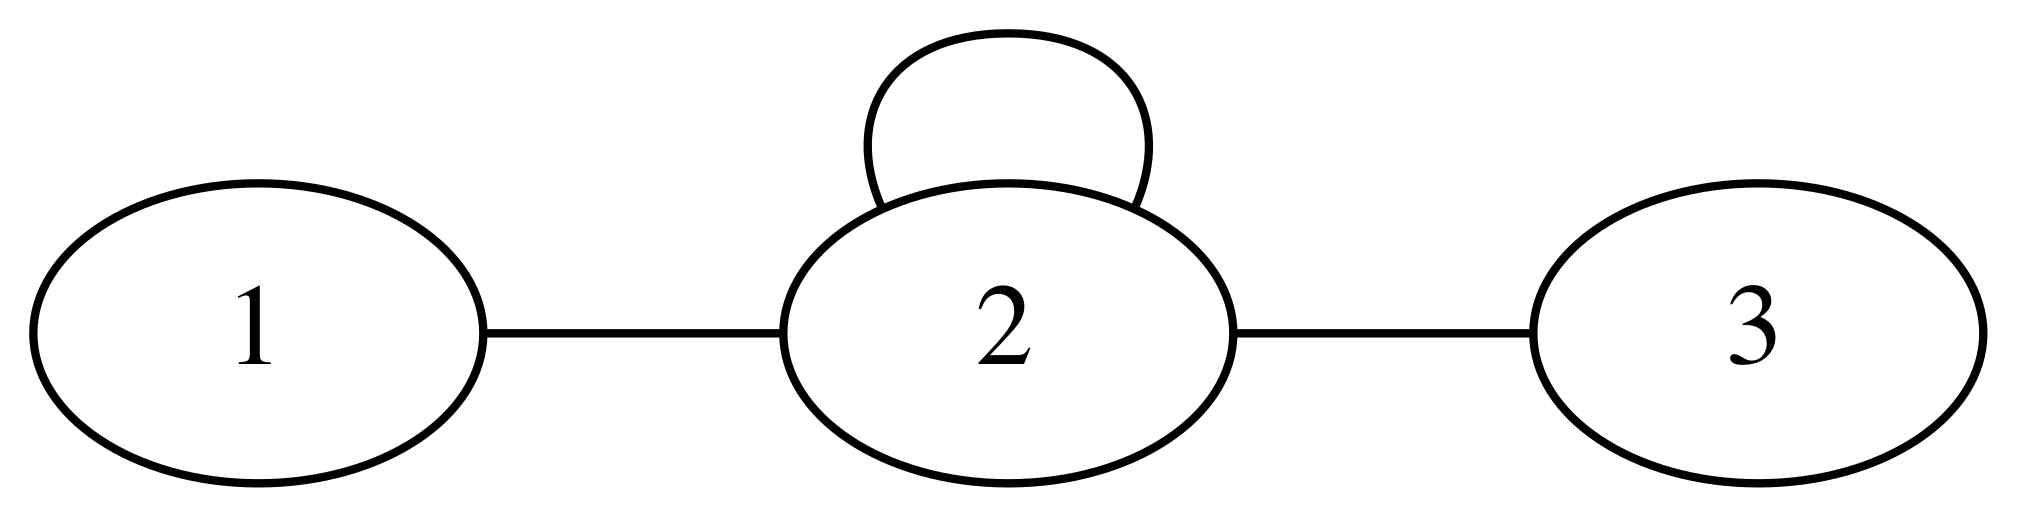

In [15]:
d2 = to_pydot(g2)
d2.set_dpi(600)
d2.set_rankdir('LR')
Image(d2.create_png(), width=600)

## 워크, 패스, 사이클, 트레일

어떤 노드를 출발해서 다른 노드로 도달하기 위한 인접한 노드의 순서열 워크(walk)라고 한다. 워크 중에서 시작과 끝을 제외한 다른 노드에 대해서 동일한 노드를 두 번 이상 지나지 않는 워크를 패스(path)라고 한다. 패스 중에서 시작점과 끝점이 동일한 패스를 사이클(cycle)이라고 한다. 사이클이 없는 그래프를 어사이클릭 그래프(acyclic graph)라고 한다. 어떠한 노드든 동일한 노드를 두 번 이상 지나지 않는 워크는 트레일(trail)이라고 한다.

다음 그래프  𝑔3 에서 워크, 트레일, 패스, 사이클을 찾아보자.

+ 𝑎−𝑐−𝑑−𝑐−𝑒 는  𝑎 에서  𝑐 로 가는 워크이다. 하지만 트레일이나 패스는 아니다.
+ 𝑎−𝑏−𝑐−𝑑−𝑒 는 트레일이다.
+ 𝑎−𝑏−𝑐−𝑑−𝑒−𝑐 는 패스지만 트레일은 아니다.
+ 𝑎−𝑏−𝑐−𝑎 는 사이클이다.


In [16]:
nodes = ["a", "b", "c", "d", "e", "f"]
edges = [("a", "b"), ("a", "c"), ("b", "c"), ("c", "d"), ("d", "e"), ("c", "e")]

g3 = nx.Graph()

for node in nodes:
    g3.add_node(node)

In [18]:
for edge in edges:
    g3.add_edge(edge[0], edge[1])

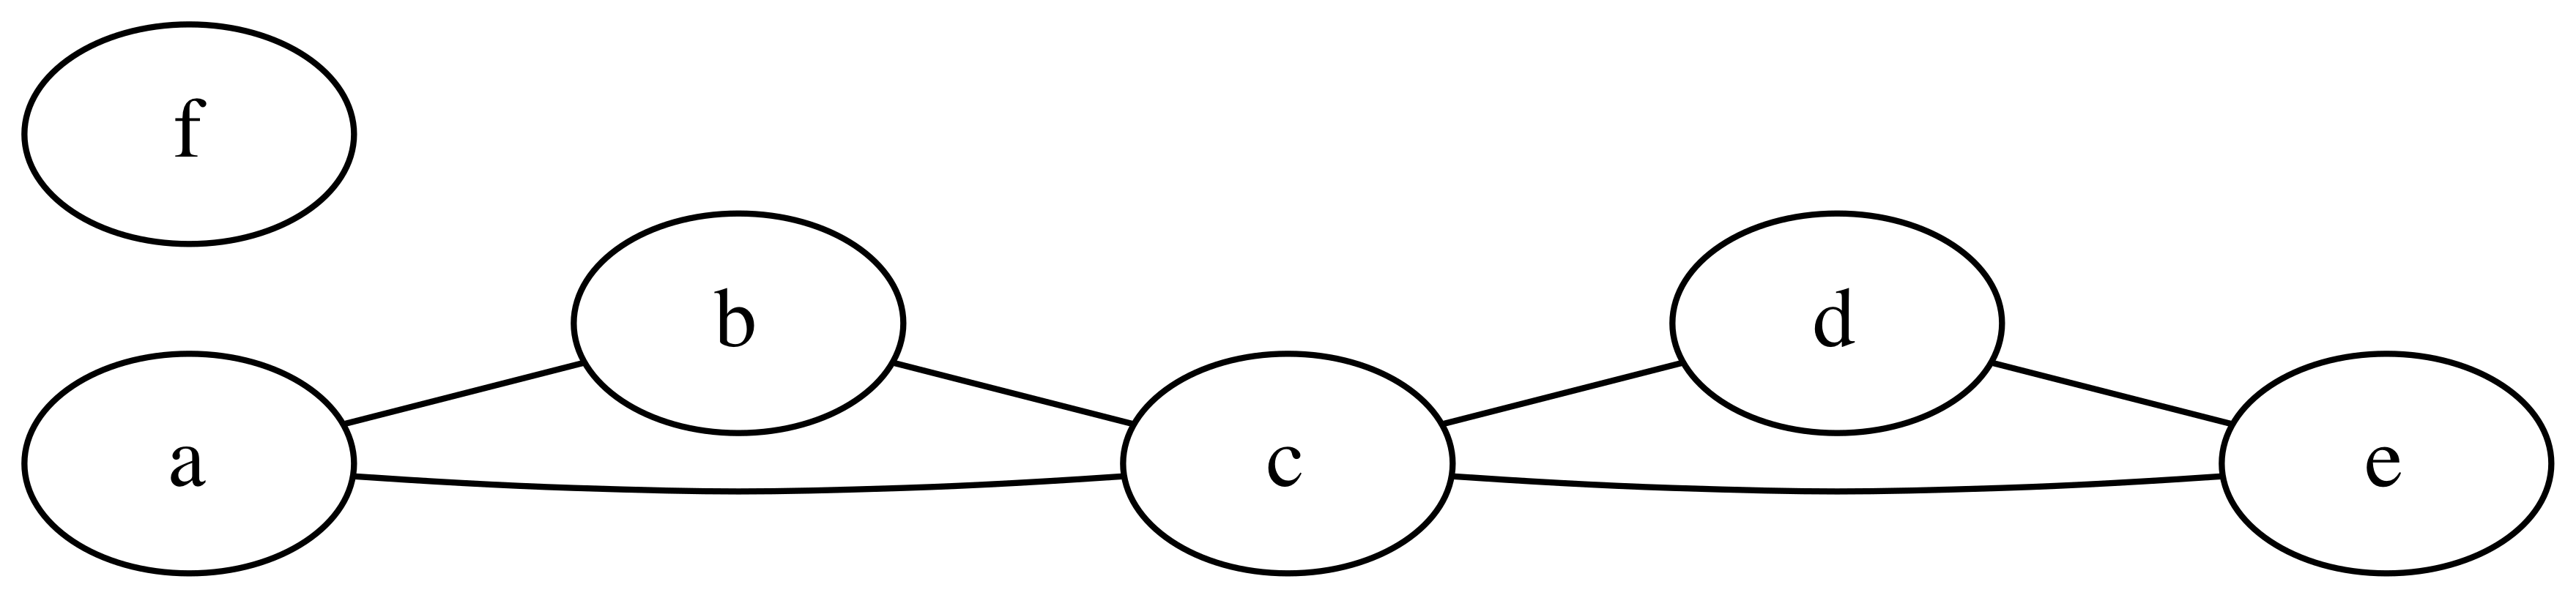

In [19]:
d3 = to_pydot(g3)
d3.set_dpi(600)
d3.set_rankdir("LR")
Image(d3.create_png(), width=800)

has_path 명령으로 두 노드간에 패스가 존재하는지 알 수 있다. 패스가 존재하면 shortest_path 명령으로 가장 짧은 패스를 구할 수 있다.

In [20]:
nx.has_path(g3, "a", "b"), nx.has_path(g3, "a", "e"), nx.has_path(g3, "a", "f")

(True, True, False)

In [21]:
nx.shortest_path(g3, "a", "e")

['a', 'c', 'e']

## 클리크

무방향성 그래프의 노드 집합 중에서 모든 노드끼리 간선이 존재하면 그 노드 집합을 클리크(clique)라고 한다. 만약 클리크에 포함된 노드에 인접한 다른 노드를 추가하면 클리크가 아니게 되는 것을 최대클리크(maximal clique)라고 한다. 다음 그래프  𝑔3 에서 클리크를 찾아보자.

+ {𝑎,𝑏} 는 클리크이다. 하지만 최대클리크는 아니다.
+ {𝑎,𝑏,𝑐} 는 클리크이며 최대클리크이다.

In [22]:
g4 = nx.Graph()
nodes = "abcdef"

for node in nodes:
    g4.add_node(node)

In [23]:
edges = [("a", "b"), ("a", "c"), ("b", "c"), ("b", "d"), ("c", "d"), ("d", "e"), ('d', 'f'), ("e", "f")]

for edge in edges:
    g4.add_edge(edge[0], edge[1])

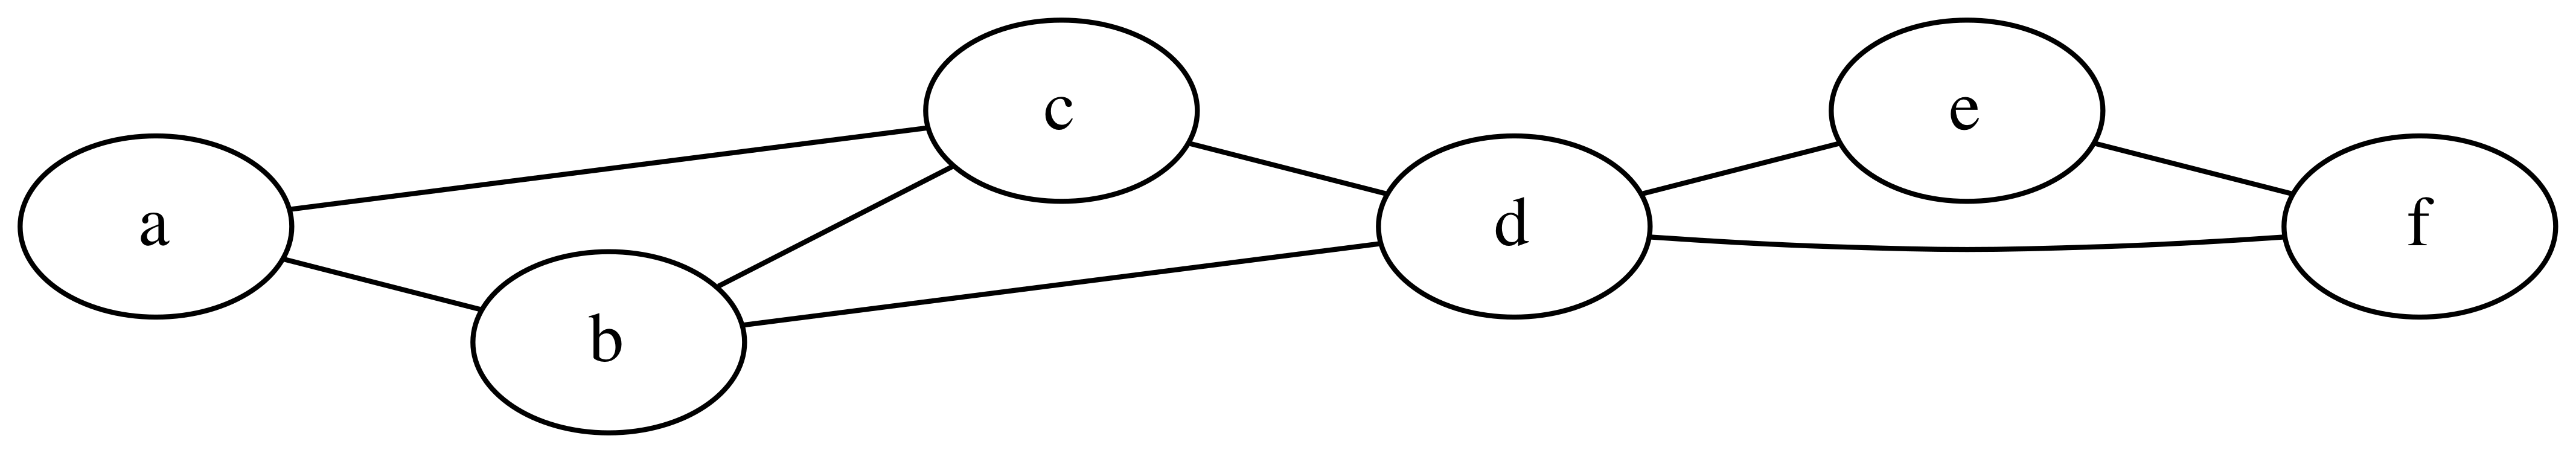

In [24]:
d4 = to_pydot(g4)
d4.set_dpi(600)
d4.set_rankdir('LR')
Image(d4.create_png(), width=800)

cliques_containing_node 명령은 특정 노드를 포함하는 클리크를 찾는다.

In [25]:
nx.cliques_containing_node(g4, ["a"])

{'a': [['a', 'b', 'c']]}

In [26]:
nx.cliques_containing_node(g4, ["a", "b"])

{'a': [['a', 'b', 'c']], 'b': [['d', 'b', 'c'], ['a', 'b', 'c']]}

enumerate_all_cliques 명령은 모든 클리크를, find_cliques는 모든 최대클리크를 찾는다.

In [28]:
[c for c in nx.enumerate_all_cliques(g4)]

[['a'],
 ['b'],
 ['c'],
 ['d'],
 ['e'],
 ['f'],
 ['a', 'b'],
 ['a', 'c'],
 ['b', 'c'],
 ['b', 'd'],
 ['c', 'd'],
 ['d', 'e'],
 ['d', 'f'],
 ['e', 'f'],
 ['a', 'b', 'c'],
 ['b', 'c', 'd'],
 ['d', 'e', 'f']]

In [29]:
[c for c in nx.find_cliques(g4)]

[['d', 'e', 'f'], ['d', 'b', 'c'], ['a', 'b', 'c']]